### Students adaptability to online learning

In [34]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go



from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool



In [2]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import the dataset
df = pd.read_csv('students_adaptability_data.csv')
df.head(5)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [4]:
#  Length of the dataframe
len(df)

1205

In [5]:
# Identify the datatype used in the data
df.dtypes

Gender                 object
Age                    object
Education Level        object
Institution Type       object
IT Student             object
Location               object
Load-shedding          object
Financial Condition    object
Internet Type          object
Network Type           object
Class Duration         object
Self Lms               object
Device                 object
Adaptivity Level       object
dtype: object

In [6]:
# The categories of data in the dataset
for column in df.columns:
    print(f'{column}: ', df[column].unique())

Gender:  ['Boy' 'Girl']
Age:  ['21-25' '16-20' '11-15' '26-30' '6-10' '1-5']
Education Level:  ['University' 'College' 'School']
Institution Type:  ['Non Government' 'Government']
IT Student:  ['No' 'Yes']
Location:  ['Yes' 'No']
Load-shedding:  ['Low' 'High']
Financial Condition:  ['Mid' 'Poor' 'Rich']
Internet Type:  ['Wifi' 'Mobile Data']
Network Type:  ['4G' '3G' '2G']
Class Duration:  ['3-6' '1-3' '0']
Self Lms:  ['No' 'Yes']
Device:  ['Tab' 'Mobile' 'Computer']
Adaptivity Level:  ['Moderate' 'Low' 'High']


### Data Visualization

In [7]:
# Plot the distribution of gender in every age group

# Count occurrences of Boys and Girls in each Age Group
grouped_data = df.groupby(['Age', 'Gender']).size().unstack(fill_value=0)

# Extract age groups and counts
age_groups = grouped_data.index.tolist()
boys_count = grouped_data.get('Boy', pd.Series(0, index=age_groups))  # Default to 0 if missing
girls_count = grouped_data.get('Girl', pd.Series(0, index=age_groups))  # Default to 0 if missing

# Create figure
fig = go.Figure()

# Add Boys' bars
fig.add_trace(go.Bar(x=age_groups, y=boys_count, name='Boys', marker_color='blue'))

# Add Girls' bars
fig.add_trace(go.Bar(x=age_groups, y=girls_count, name='Girls', marker_color='gray'))

# Update layout for grouped bars
fig.update_layout(
    title='Count of Boys and Girls by Age Group',
    xaxis_title='Age Group',
    yaxis_title='Count',
    barmode='group',  # Groups the bars side by side
    bargap=0.2,       # Space between bars
    bargroupgap=0.1   # Space between groups
)

# Show figure
fig.show()


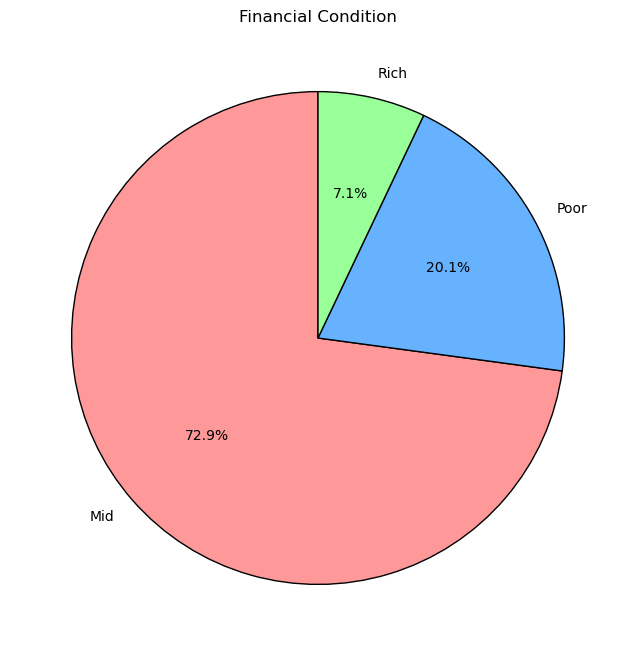

In [8]:
# Grouping data by Financial Condition
no_of_occurrences = df['Financial Condition'].value_counts()
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    no_of_occurrences, 
    labels = no_of_occurrences.index, 
    autopct = '%1.1f%%', 
    startangle =90, 
    colors = ['#FF9999', '#66B2FF', '#99FF99'], 
    wedgeprops = {'edgecolor': 'black'}
)

# Add a title
plt.title('Financial Condition')
plt.show()

In [9]:
# Visualize the type of connection the students have access to 
fig = px.histogram(df, x='Internet Type', title="Internet Type Distribution")
fig.show()

In [10]:
# Visualize the type of devices the students have access to 
fig = px.histogram(df, x='Device', title="Internet Type Distribution")
fig.show()

### Data processing

In [11]:
# Types of data present in the dataframe
df = pd.read_csv('students_adaptability_data.csv')
df.dtypes

Gender                 object
Age                    object
Education Level        object
Institution Type       object
IT Student             object
Location               object
Load-shedding          object
Financial Condition    object
Internet Type          object
Network Type           object
Class Duration         object
Self Lms               object
Device                 object
Adaptivity Level       object
dtype: object

In [12]:
# Divide the data into features and target
features = df.drop(columns= 'Adaptivity Level', axis=1)
target = df[['Adaptivity Level']]

In [13]:
# Show features
features.head(3)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile


In [14]:
# Show target
target.tail(3)

,Adaptivity Level
1202,Moderate
1203,Low
1204,Moderate


In [15]:
# One-hot encode the feature and Target data frames

# create a One-hot encoder
one_hot_1 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
one_hot_2 = LabelEncoder()

# Encode the data frames
encoded_features = one_hot_1.fit_transform(features)
encoded_target = one_hot_2.fit_transform(target)

# Show encoded Features and Target
print('Encoded Features', encoded_features[:3])
print('\nEncoded Target', encoded_target[:3])

Encoded Features [[1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1.
  0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0.
  0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1.
  0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0.]]

Encoded Target [2 2 2]


c:\Users\Billy Ochieng\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [16]:
# View classes
print('Encoded Features:\n', one_hot_1.categories_)
print('\nEncoded Target:\n', one_hot_2.classes_)

Encoded Features:
 [array(['Boy', 'Girl'], dtype=object), array(['1-5', '11-15', '16-20', '21-25', '26-30', '6-10'], dtype=object), array(['College', 'School', 'University'], dtype=object), array(['Government', 'Non Government'], dtype=object), array(['No', 'Yes'], dtype=object), array(['No', 'Yes'], dtype=object), array(['High', 'Low'], dtype=object), array(['Mid', 'Poor', 'Rich'], dtype=object), array(['Mobile Data', 'Wifi'], dtype=object), array(['2G', '3G', '4G'], dtype=object), array(['0', '1-3', '3-6'], dtype=object), array(['No', 'Yes'], dtype=object), array(['Computer', 'Mobile', 'Tab'], dtype=object)]

Encoded Target:
 ['High' 'Low' 'Moderate']


In [17]:
# Divide the encoded datasets into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(encoded_features, encoded_target, test_size=.1)

In [18]:
# Show the length of the split data
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

1084
121
1084
121


## Model Training
### Model 1: Multiclass Classifier(Logistic Regression)

In [19]:
# Initiate model
model1 = LogisticRegression(random_state=0, multi_class='ovr')

# Training the model
model1.fit(X_train, y_train)

c:\Users\Billy Ochieng\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.



LogisticRegression(multi_class='ovr', random_state=0)

In [20]:
# Make predictions
predictions = model1.predict(X_test)

In [21]:
# Cross-validate model using accuracy
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[ 5  0  4]
 [ 0 28 15]
 [ 3 11 55]]


In [22]:
# Compare the predictions vs the test target
print(y_test[:5])
print(predictions[:5])

[2 2 1 2 1]
[2 1 2 2 2]


In [23]:
# Model accuracy
model1_accuracy = accuracy_score(y_test, predictions)
model1_accuracy

0.7272727272727273

### Model 2: Decision Tree

In [24]:
# Initiate the model
model2 = DecisionTreeClassifier(random_state=0)

# Train the model
model2.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

In [25]:
# Make predictions
predictions = model2.predict(X_test)

In [26]:
# Compare the prediction to the real values
print('Predictions: ', predictions[:10])
print('Real values: ', y_test[:10])

Predictions:  [2 1 1 2 1 1 2 1 2 2]
Real values:  [2 2 1 2 1 1 2 1 2 2]


In [27]:
# View predicted class probabilities
model2.predict_proba(X_test[:10])

array([[0.        , 0.        , 1.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.28571429, 0.71428571]])

In [28]:
# Get accuracy score
model2_accuracy = accuracy_score(y_test, predictions)
model2_accuracy

0.8842975206611571

In [29]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.88      0.78      0.82         9\n           1       0.83      0.93      0.88        43\n           2       0.92      0.87      0.90        69\n\n    accuracy                           0.88       121\n   macro avg       0.88      0.86      0.87       121\nweighted avg       0.89      0.88      0.88       121\n'

### Model3: Random Forest

In [30]:
# Initiate the model
model3 = RandomForestClassifier(random_state=0, n_jobs=-1)

# Train the model
model3.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [31]:
# Predict features
predictions = model3.predict(X_test)

In [32]:
model3_accuracy = accuracy_score(y_test, predictions)
model3_accuracy

0.8677685950413223

In [35]:
confusionmatrix = confusion_matrix(y_test, predictions)
confusionmatrix

array([[ 7,  0,  2],
       [ 0, 38,  5],
       [ 1,  8, 60]], dtype=int64)

In [36]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.88      0.78      0.82         9\n           1       0.83      0.88      0.85        43\n           2       0.90      0.87      0.88        69\n\n    accuracy                           0.87       121\n   macro avg       0.87      0.84      0.85       121\nweighted avg       0.87      0.87      0.87       121\n'

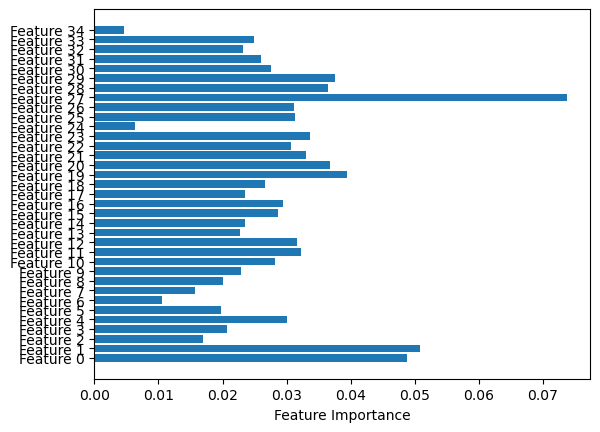

In [37]:
# Plot feature importance
importances = model3.feature_importances_
plt.barh(range(len(importances)), importances)
plt.yticks(range(len(importances)), [f"Feature {i}" for i in range(len(importances))])
plt.xlabel('Feature Importance')
plt.show()

# importances = model3.feature_importances_
# # Sort feature importances in descending order
# indices = np.argsort(importances)[::-1]
# # Rearrange feature names so they match the sorted feature importances
# names = [iris.feature_names[i] for i in indices]
# # Create plot
# plt.figure()
# # Create plot title
# plt.title("Feature Importance")
# # Add bars
# plt.bar(range(features.shape[1]), importances[indices])
# # Add feature names as x-axis labels
# plt.xticks(range(features.shape[1]), names, rotation=90)
# # Show plot
# plt.show()


### Model 4: CatBoost

In [38]:
# Train model
model4 = CatBoostClassifier(iterations=100, depth=10, learning_rate=0.1, loss_function='MultiClass')
model4.fit(X_train, y_train)

0:	learn: 1.0362781	total: 164ms	remaining: 16.3s
1:	learn: 0.9943491	total: 165ms	remaining: 8.11s
2:	learn: 0.9517234	total: 183ms	remaining: 5.92s
3:	learn: 0.9112372	total: 217ms	remaining: 5.21s
4:	learn: 0.8668940	total: 251ms	remaining: 4.76s
5:	learn: 0.8300492	total: 286ms	remaining: 4.48s
6:	learn: 0.7946202	total: 324ms	remaining: 4.31s
7:	learn: 0.7674278	total: 357ms	remaining: 4.1s
8:	learn: 0.7380172	total: 394ms	remaining: 3.98s
9:	learn: 0.7124831	total: 427ms	remaining: 3.84s
10:	learn: 0.6859692	total: 463ms	remaining: 3.75s
11:	learn: 0.6634275	total: 498ms	remaining: 3.65s
12:	learn: 0.6424551	total: 530ms	remaining: 3.54s
13:	learn: 0.6193638	total: 563ms	remaining: 3.46s
14:	learn: 0.5991505	total: 594ms	remaining: 3.36s
15:	learn: 0.5848842	total: 605ms	remaining: 3.17s
16:	learn: 0.5688832	total: 640ms	remaining: 3.13s
17:	learn: 0.5559603	total: 679ms	remaining: 3.1s
18:	learn: 0.5429289	total: 716ms	remaining: 3.05s
19:	learn: 0.5318192	total: 736ms	remaining

In [39]:
# Predict new feature
predictions = model4.predict(X_test)

In [40]:
# Get the accuracy of the model
model4_accuracy = accuracy_score(y_test, predictions)
model4_accuracy

0.8842975206611571

In [41]:
# Create accuracy table
accuracy = {'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'CatBoost'],
            'Accuracy_scores': [model1_accuracy, model2_accuracy, model3_accuracy, model4_accuracy]}


In [42]:
accuracy_df = pd.DataFrame(accuracy)
accuracy_df

,Model,Accuracy_scores
0,Logistic Regression,0.727273
1,Decision Tree,0.884298
2,Random Forest,0.867769
3,CatBoost,0.884298
